<h2> Graduation Project Network Models</h2>

In [1]:
import numpy as np
from keras import layers
from keras.layers import Input, Dense, Dropout, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, Embedding, Add
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D, LSTM, SpatialDropout1D
from keras.models import Sequential, Model
from keras.preprocessing import image
from keras.utils import plot_model
from keras.applications.inception_v3 import InceptionV3

<b>Simple ANN</b>

In [2]:
ann_model=Sequential()
ann_model.add(Dense(12, input_dim=8, activation='relu'))
ann_model.add(Dense(12, activation='relu'))
ann_model.add(Dense(8, activation='relu'))
ann_model.add(Dense(8, activation='relu'))
ann_model.add(Dense(1, activation='sigmoid'))

In [3]:
ann_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [4]:
#ann_model.fit(X, y, epochs=150, batch_size=10) need X and y

In [5]:
ann_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                108       
_________________________________________________________________
dense_1 (Dense)              (None, 12)                156       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 9         
Total params: 449
Trainable params: 449
Non-trainable params: 0
_________________________________________________________________


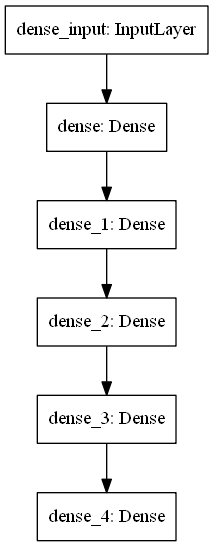

In [6]:
plot_model(ann_model)

<b>CNN</b>

<b> Lenet-5 </b>

In [7]:
lenet_5_model=Sequential()

lenet_5_model.add(Conv2D(filters=6, strides=(1,1), kernel_size=(5, 5), input_shape=(32,32,1)))
lenet_5_model.add(BatchNormalization(axis = 3))
lenet_5_model.add(Activation('relu'))
lenet_5_model.add(AveragePooling2D(strides=(2,2), pool_size=(2, 2)))

lenet_5_model.add(Conv2D(filters=16, strides=(1,1), kernel_size=(5, 5)))
lenet_5_model.add(BatchNormalization(axis = 3))
lenet_5_model.add(Activation('relu'))
lenet_5_model.add(AveragePooling2D(strides=(2,2), pool_size=(2, 2)))

lenet_5_model.add(Flatten())

lenet_5_model.add(Dense(units=120, activation='relu'))

lenet_5_model.add(Dense(units=84, activation='relu'))

lenet_5_model.add(Dense(units=10, activation = 'softmax'))

In [8]:
lenet_5_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [9]:
#lenet_5_model.fit(X, y, epochs=150, batch_size=10) need X and y

In [10]:
lenet_5_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 6)         24        
_________________________________________________________________
activation (Activation)      (None, 28, 28, 6)         0         
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
batch_normalization_1 (Batch (None, 10, 10, 16)        64        
_________________________________________________________________
activation_1 (Activation)    (None, 10, 10, 16)       

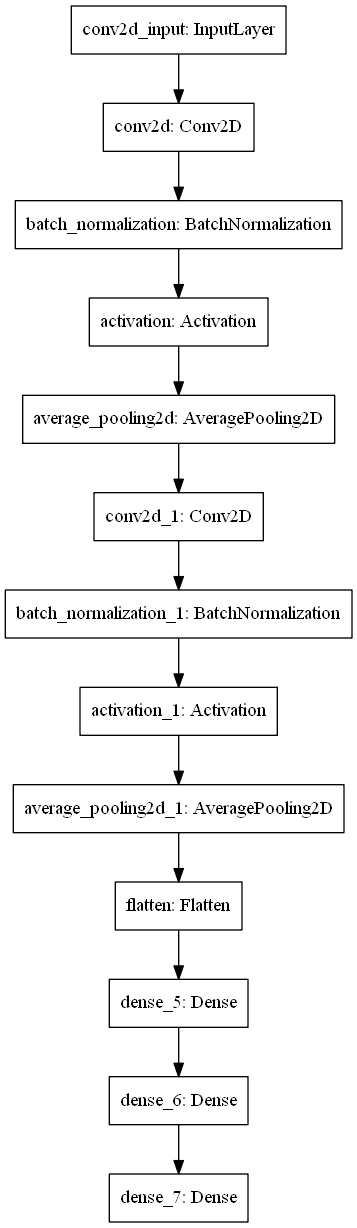

In [11]:
plot_model(lenet_5_model)

<b>AlexNet</b>

In [12]:
alexNet_model=Sequential()

alexNet_model.add(Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), input_shape=(227,227,3)))
alexNet_model.add(BatchNormalization(axis = 3))
alexNet_model.add(Activation('relu'))
alexNet_model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))

alexNet_model.add(Conv2D(filters=256, kernel_size=(5,5), padding='same'))
alexNet_model.add(BatchNormalization(axis = 3))
alexNet_model.add(Activation('relu'))
alexNet_model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))

alexNet_model.add(Conv2D(filters=384, padding='same', kernel_size=(3,3)))
alexNet_model.add(BatchNormalization(axis = 3))
alexNet_model.add(Activation('relu'))
alexNet_model.add(Conv2D(filters=384, kernel_size=(3,3)))
alexNet_model.add(BatchNormalization(axis = 3))
alexNet_model.add(Activation('relu'))
alexNet_model.add(Conv2D(filters=256, kernel_size=(3,3)))
alexNet_model.add(BatchNormalization(axis = 3))
alexNet_model.add(Activation('relu'))
alexNet_model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))

alexNet_model.add(Flatten())
alexNet_model.add(Dense(4096, activation='relu'))
alexNet_model.add(Dropout(0.4))
alexNet_model.add(Dense(4096, activation='relu'))
alexNet_model.add(Dropout(0.4))
alexNet_model.add(Dense(1000))
alexNet_model.add(Dropout(0.4))
alexNet_model.add(Activation('sigmoid'))

In [13]:
alexNet_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [14]:
#alexNet_model.fit(X, y, epochs=150, batch_size=10) need X and y

In [15]:
alexNet_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 55, 55, 96)        34944     
_________________________________________________________________
batch_normalization_2 (Batch (None, 55, 55, 96)        384       
_________________________________________________________________
activation_2 (Activation)    (None, 55, 55, 96)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 27, 27, 96)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 27, 27, 256)       614656    
_________________________________________________________________
batch_normalization_3 (Batch (None, 27, 27, 256)       1024      
_________________________________________________________________
activation_3 (Activation)    (None, 27, 27, 256)      

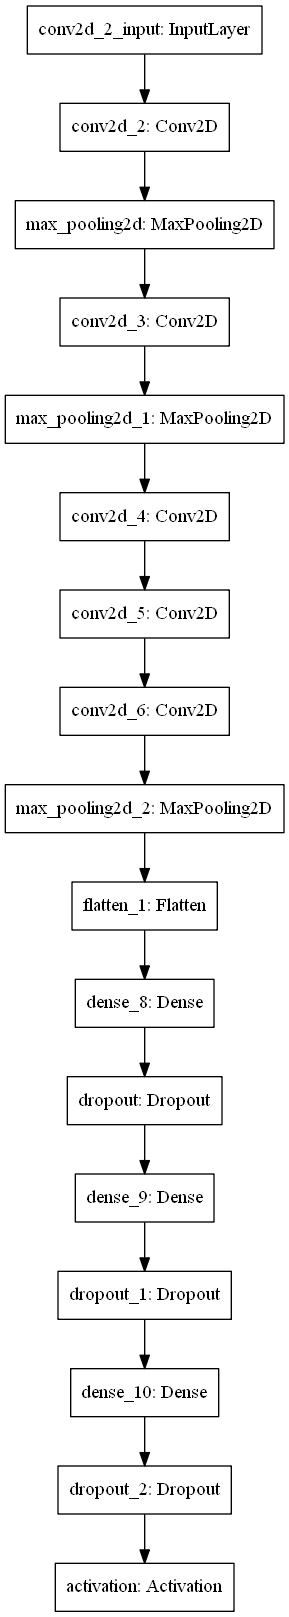

In [16]:
plot_model(alexNet_model)

<b>VGG-16</b>

In [16]:
vgg_16_model=Sequential()

vgg_16_model.add(Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='same', input_shape=(224,224,3)))
vgg_16_model.add(BatchNormalization(axis = 3))
vgg_16_model.add(Activation('relu'))
vgg_16_model.add(Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='same'))
vgg_16_model.add(BatchNormalization(axis = 3))
vgg_16_model.add(Activation('relu'))
vgg_16_model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

vgg_16_model.add(Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), padding='same'))
vgg_16_model.add(BatchNormalization(axis = 3))
vgg_16_model.add(Activation('relu'))
vgg_16_model.add(Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), padding='same'))
vgg_16_model.add(BatchNormalization(axis = 3))
vgg_16_model.add(Activation('relu'))
vgg_16_model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

vgg_16_model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'))
vgg_16_model.add(BatchNormalization(axis = 3))
vgg_16_model.add(Activation('relu'))
vgg_16_model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'))
vgg_16_model.add(BatchNormalization(axis = 3))
vgg_16_model.add(Activation('relu'))
vgg_16_model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'))
vgg_16_model.add(BatchNormalization(axis = 3))
vgg_16_model.add(Activation('relu'))
vgg_16_model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

vgg_16_model.add(Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), padding='same'))
vgg_16_model.add(BatchNormalization(axis = 3))
vgg_16_model.add(Activation('relu'))
vgg_16_model.add(Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), padding='same'))
vgg_16_model.add(BatchNormalization(axis = 3))
vgg_16_model.add(Activation('relu'))
vgg_16_model.add(Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), padding='same'))
vgg_16_model.add(BatchNormalization(axis = 3))
vgg_16_model.add(Activation('relu'))
vgg_16_model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

vgg_16_model.add(Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), padding='same'))
vgg_16_model.add(BatchNormalization(axis = 3))
vgg_16_model.add(Activation('relu'))
vgg_16_model.add(Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), padding='same'))
vgg_16_model.add(BatchNormalization(axis = 3))
vgg_16_model.add(Activation('relu'))
vgg_16_model.add(Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), padding='same'))
vgg_16_model.add(BatchNormalization(axis = 3))
vgg_16_model.add(Activation('relu'))
vgg_16_model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

vgg_16_model.add(Flatten())
vgg_16_model.add(Dense(4096, activation='relu'))
vgg_16_model.add(Dropout(0.4))
vgg_16_model.add(Dense(4096, activation='relu'))
vgg_16_model.add(Dropout(0.4))
vgg_16_model.add(Dense(1000))
vgg_16_model.add(Dropout(0.4))
vgg_16_model.add(Activation('sigmoid'))

In [17]:
vgg_16_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [18]:
#vgg_16_model.fit(X, y, epochs=150, batch_size=10) need X and y

In [19]:
vgg_16_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 224, 224, 64)      1792      
_________________________________________________________________
batch_normalization_7 (Batch (None, 224, 224, 64)      256       
_________________________________________________________________
activation_8 (Activation)    (None, 224, 224, 64)      0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
batch_normalization_8 (Batch (None, 224, 224, 64)      256       
_________________________________________________________________
activation_9 (Activation)    (None, 224, 224, 64)      0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 112, 112, 64)     

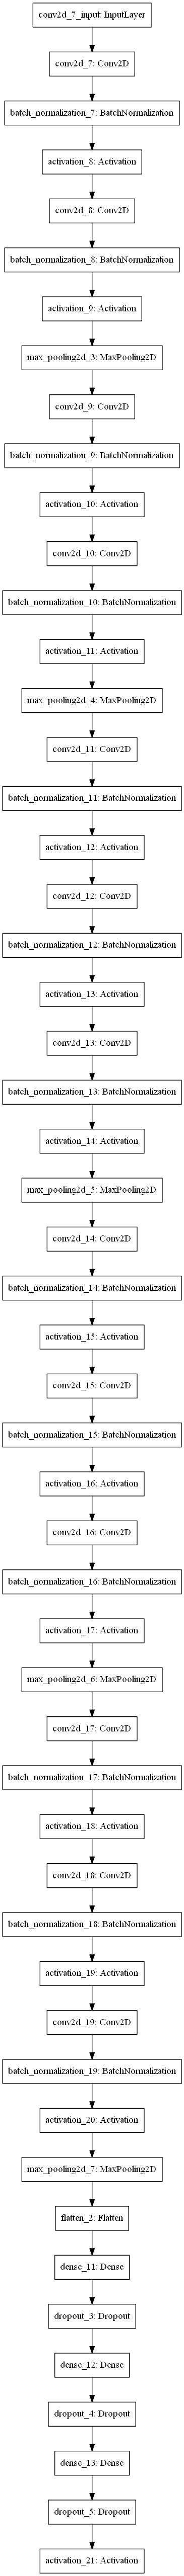

In [20]:
plot_model(vgg_16_model)

<b> ResNet </b>

In [21]:
def identity_block(X, f, filters):
    F1, F2, F3 = filters
    
    X_shortcut = X
    
    X = Conv2D(filters = F1, kernel_size = (1, 1), strides = (1,1), padding = 'valid')(X)
    X = BatchNormalization(axis = 3)(X)
    X = Activation('relu')(X)
    
    X = Conv2D(filters = F2, kernel_size = (f, f), strides = (1,1), padding = 'same')(X)
    X = BatchNormalization(axis = 3)(X)
    X = Activation('relu')(X)

    X = Conv2D(filters = F3, kernel_size = (1, 1), strides = (1,1), padding = 'valid')(X)
    X = BatchNormalization(axis = 3)(X)

    X = Add()([X,X_shortcut])
    X = Activation('relu')(X)
    
    
    return X

In [22]:
def convolutional_block(X, f, filters, s = 2):
    F1, F2, F3 = filters
    
    X_shortcut = X

    X = Conv2D(F1, (1, 1), strides = (s,s))(X)
    X = BatchNormalization(axis = 3)(X)
    X = Activation('relu')(X)
    
    X = Conv2D(F2, (f, f), strides = (1,1),padding = 'same')(X)
    X = BatchNormalization(axis = 3)(X)
    X = Activation('relu')(X)

    X = Conv2D(F3, (1, 1), strides = (1,1))(X)
    X = BatchNormalization(axis = 3,)(X)

    X_shortcut = Conv2D(F3, (1, 1), strides = (s,s))(X_shortcut)
    X_shortcut = BatchNormalization(axis = 3)(X_shortcut)
    
    X = Add()([X,X_shortcut])
    X = Activation('relu')(X)
    
    return X

In [23]:
def ResNet50(input_shape = (64, 64, 3)):
    
    X_input = Input(input_shape)

    X = ZeroPadding2D((3, 3))(X_input)
    
    X = Conv2D(64, (7, 7), strides = (2, 2))(X)
    X = BatchNormalization(axis = 3)(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((3, 3), strides=(2, 2))(X)

    X = convolutional_block(X, f = 3, filters = [64, 64, 256], s = 1)
    X = identity_block(X, 3, [64, 64, 256])
    X = identity_block(X, 3, [64, 64, 256])

    X = convolutional_block(X, f = 3, filters = [128,128,512], s = 2)
    X = identity_block(X, 3, [128,128,512])
    X = identity_block(X, 3, [128,128,512])
    X = identity_block(X, 3, [128,128,512])

    X = convolutional_block(X, f = 3, filters = [256, 256, 1024], s = 2)
    X = identity_block(X, 3, [256, 256, 1024])
    X = identity_block(X, 3, [256, 256, 1024])
    X = identity_block(X, 3, [256, 256, 1024])
    X = identity_block(X, 3, [256, 256, 1024])
    X = identity_block(X, 3, [256, 256, 1024])

    X = convolutional_block(X, f = 3, filters = [512, 512, 2048], s = 2)
    X = identity_block(X, 3, [512, 512, 2048])
    X = identity_block(X, 3, [512, 512, 2048])

    X = AveragePooling2D((2, 2))(X)
    
    X = Flatten()(X)
    X = Dense(6,activation='softmax')(X)
    
    model = Model(inputs = X_input, outputs = X, name='ResNet50')

    return model

In [24]:
resNet50_model = ResNet50(input_shape = (64, 64, 3))

In [25]:
resNet50_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [26]:
#resNet50_model.fit(X, y, epochs=150, batch_size=10) need X and y

In [27]:
resNet50_model.summary()

Model: "ResNet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 64, 64, 3)]  0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 70, 70, 3)    0           input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_20 (Conv2D)              (None, 32, 32, 64)   9472        zero_padding2d[0][0]             
__________________________________________________________________________________________________
batch_normalization_20 (BatchNo (None, 32, 32, 64)   256         conv2d_20[0][0]                  
___________________________________________________________________________________________

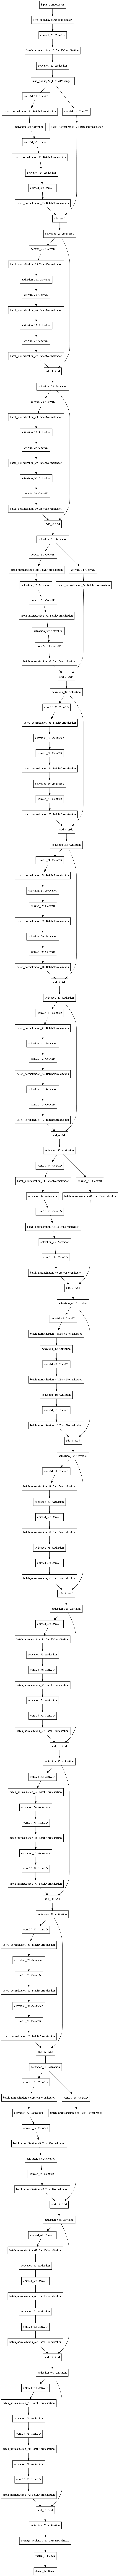

In [28]:
plot_model(resNet50_model)

<b> Inception </b>

In [29]:
inception_model = InceptionV3()

In [30]:
inception_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [31]:
#inception_model.fit(X, y, epochs=150, batch_size=10) need X and y

In [32]:
inception_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d_73 (Conv2D)              (None, 149, 149, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_73 (BatchNo (None, 149, 149, 32) 96          conv2d_73[0][0]                  
__________________________________________________________________________________________________
activation_71 (Activation)      (None, 149, 149, 32) 0           batch_normalization_73[0][0]     
_______________________________________________________________________________________

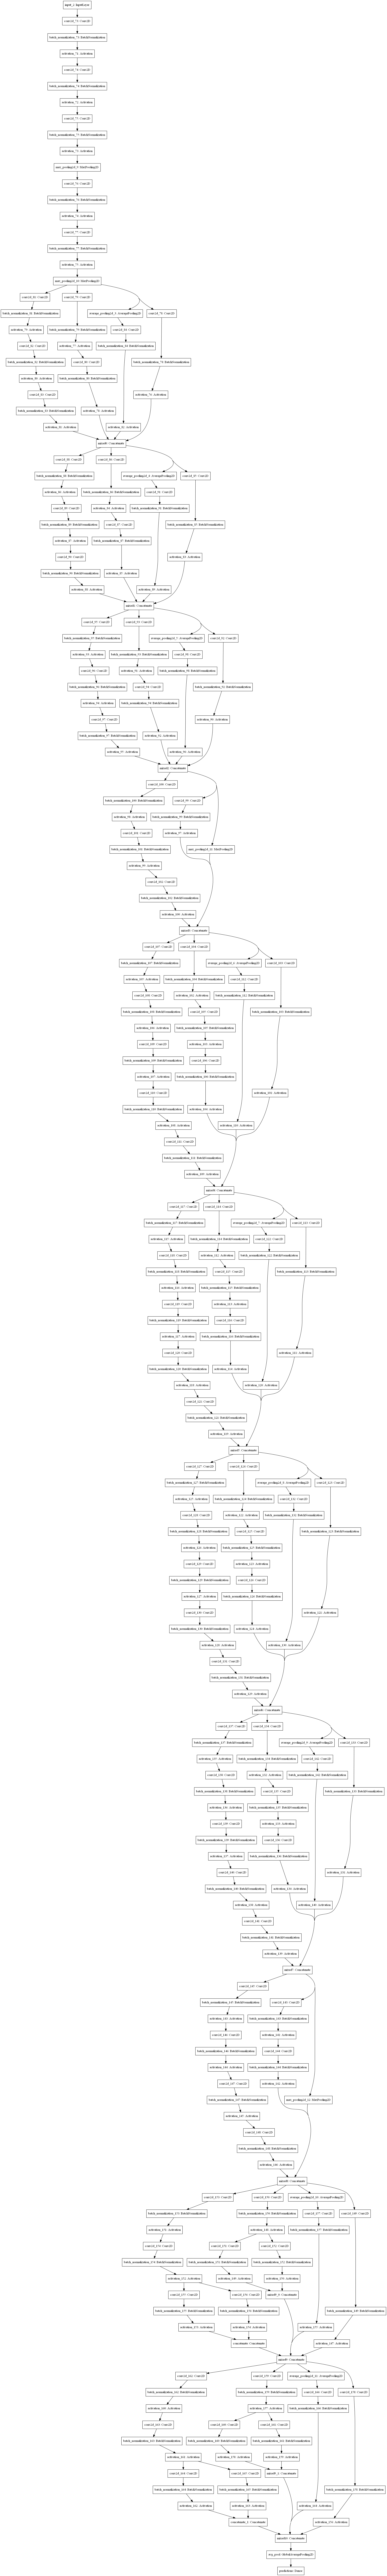

In [33]:
plot_model(inception_model)

<b> LSTM RNN </b>

In [34]:
lstm_model = Sequential()
lstm_model.add(Embedding(input_dim = 8192, output_dim = 256, input_length = 50))
lstm_model.add(SpatialDropout1D(0.3))
lstm_model.add(LSTM(256, dropout = 0.3, recurrent_dropout = 0.3))
lstm_model.add(Dense(256, activation = 'relu'))
lstm_model.add(Dropout(0.3))
lstm_model.add(Dense(5, activation = 'softmax'))

In [35]:
lstm_model.compile(loss='cosine_similarity', optimizer='adam', metrics=['accuracy'])

In [36]:
#lstm_model.fit(X, y, epochs=150, batch_size=10) need X and y

In [37]:
lstm_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 50, 256)           2097152   
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 50, 256)           0         
_________________________________________________________________
lstm (LSTM)                  (None, 256)               525312    
_________________________________________________________________
dense_15 (Dense)             (None, 256)               65792     
_________________________________________________________________
dropout_6 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 5)                 1285      
Total params: 2,689,541
Trainable params: 2,689,541
Non-trainable params: 0
____________________________________________

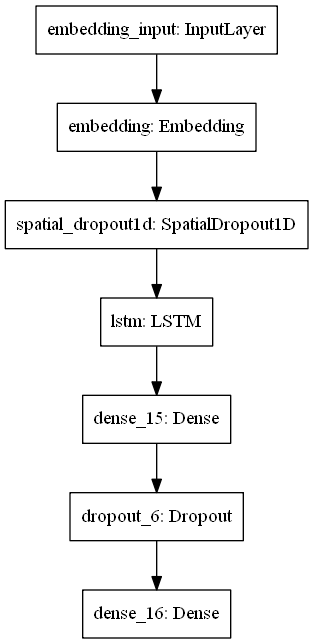

In [38]:
plot_model(lstm_model)